In [1]:
# Importing the Library
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
warnings.filterwarnings('ignore')

In [2]:
#reading data and checking how it looks
data=pd.read_csv("./data/gapmiderData.csv")
data.head(5)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [3]:
#Our Interest of Columns are country, alcconsumption, co2emissions, lifeexpectancy
dataInterest=data[["country","alcconsumption","co2emissions","lifeexpectancy"]]
dataInterest.head(2)

,country,alcconsumption,co2emissions,lifeexpectancy
0,Afghanistan,.03,75944000,48.673
1,Albania,7.29,223747333.333333,76.918


In [4]:
dataInterest["alcconsumption"]=pd.to_numeric(dataInterest["alcconsumption"],errors='coerce')
dataInterest["co2emissions"]=pd.to_numeric(dataInterest["co2emissions"],'coerce')
dataInterest["lifeexpectancy"]=pd.to_numeric(dataInterest["lifeexpectancy"],'coerce')

In [5]:
# Let's check the frequency of values in alcconsumption, co2emissions, lifeexpectancy
print(dataInterest["alcconsumption"].value_counts(dropna=False))
print("Total None values for Alcohol Consumption: ",dataInterest["alcconsumption"].isna().sum())

NaN      26
0.34      2
5.56      2
3.39      2
5.92      2
         ..
1.05      1
3.17      1
2.70      1
12.72     1
8.69      1
Name: alcconsumption, Length: 181, dtype: int64
Total None values for Alcohol Consumption:  26


In [6]:
print("Total None values for Alcohol Consumption: ",dataInterest["alcconsumption"].isna().sum())
print("Total None values for CO2 emission: ",dataInterest["co2emissions"].isna().sum())
print("Total None values for Life Expectancy: ",dataInterest["lifeexpectancy"].isna().sum())

Total None values for Alcohol Consumption:  26
Total None values for CO2 emission:  13
Total None values for Life Expectancy:  22


In [7]:
print("Shape of data before removal of NAN values ",dataInterest.shape)
dataInterest=dataInterest.dropna()
print("Shape of data after removal of NAN values ",dataInterest.shape)
dataInterest=dataInterest.dropna()

Shape of data before removal of NAN values  (213, 4)
Shape of data after removal of NAN values  (172, 4)


In [8]:
# Next we will remove out the countries that have alcohol consumption less than 1 litres to make the analysis more significant
dataInterest=dataInterest[dataInterest["alcconsumption"]>1]

##### As the data is quantitative it takes lot's of value, let's see using a histogram

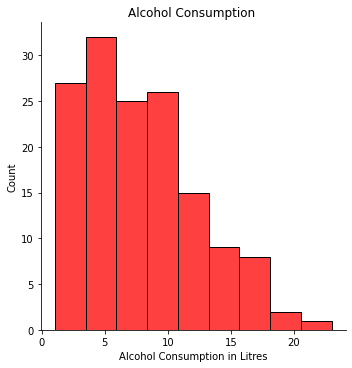

In [9]:
# Plotting quantitative variable alcconsumption
sns.displot(x="alcconsumption",data=dataInterest,kde=False,color='r')
plt.xlabel("Alcohol Consumption in Litres")
plt.title("Alcohol Consumption ");

In [10]:
print("The mean of Alcohol variables is: ",dataInterest["alcconsumption"].mean())
print("The median of Alcohol variables is: ",dataInterest["alcconsumption"].median())
print("The standard deviation of Alcohol variables is: ",dataInterest["alcconsumption"].std())

The mean of Alcohol variables is:  7.775310344827585
The median of Alcohol variables is:  7.08
The standard deviation of Alcohol variables is:  4.632098764654876


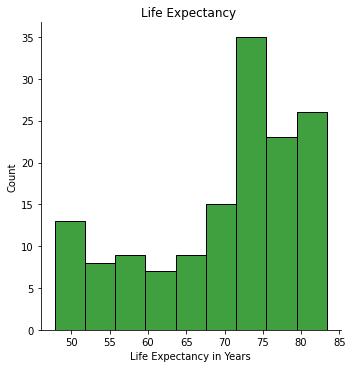

In [11]:
# Plotting quantitative variable lifeexpectancy
sns.displot(x="lifeexpectancy",data=dataInterest,kde=False,color='g')
plt.xlabel("Life Expectancy in Years")
plt.title("Life Expectancy ");

In [12]:
print("The mean of Life Expectancy variables is: ",dataInterest["lifeexpectancy"].mean())
print("The median of Life Expectancy variables is: ",dataInterest["lifeexpectancy"].median())
print("The standard deviation of lifeexpectancy variables is: ",dataInterest["lifeexpectancy"].std())

The mean of Life Expectancy variables is:  69.81048965517243
The median of Life Expectancy variables is:  73.339
The standard deviation of lifeexpectancy variables is:  9.947707724589147


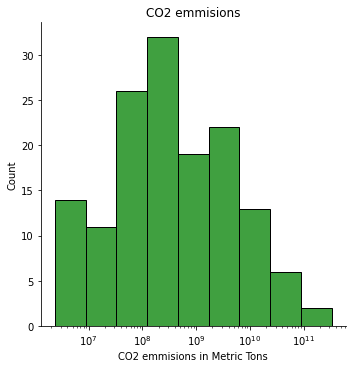

In [13]:
# Plotting quantitative variable co2emissions
sns.displot(x="co2emissions",data=dataInterest,kde=False,color='g',log_scale=True)
plt.xlabel("CO2 emmisions in Metric Tons")
plt.title("CO2 emmisions");

In [14]:
print("The mean of co2emissions variables is: ",dataInterest["co2emissions"].mean())
print("The median of co2emissions variables is: ",dataInterest["co2emissions"].median())
print("The standard deviation of co2emissions variables is: ",dataInterest["co2emissions"].std())

The mean of co2emissions variables is:  6603608657.47126
The median of co2emissions variables is:  248358000.0
The standard deviation of co2emissions variables is:  30086867862.403046


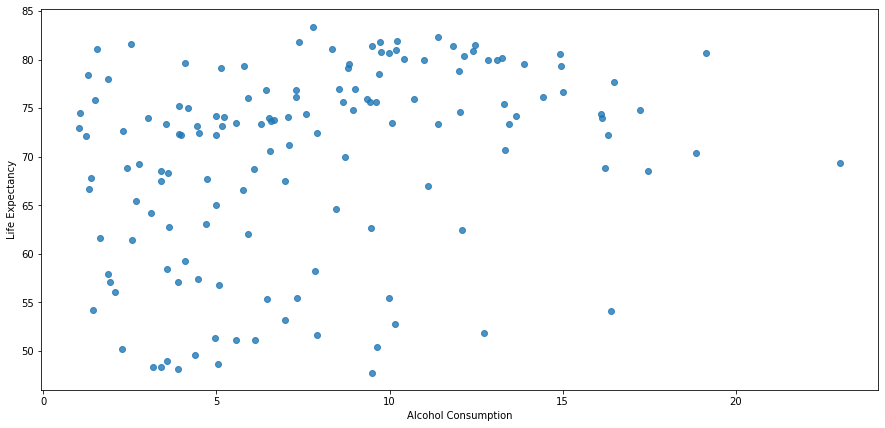

In [15]:
# Checking the relation between Alcohol Consumption and life expectancy
plt.subplots(figsize=(15,7))
sns.regplot(x="alcconsumption",y="lifeexpectancy",data=dataInterest,fit_reg=False)
plt.xlabel("Alcohol Consumption")
plt.ylabel("Life Expectancy");

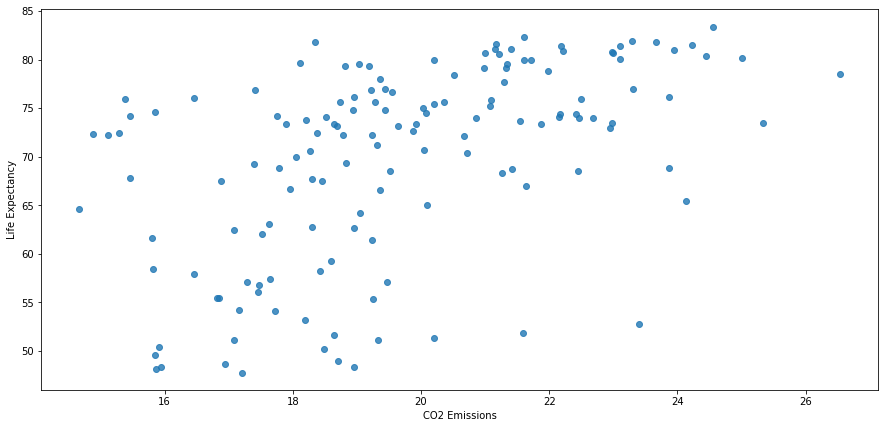

In [16]:
# Checking the relation between CO2 emissions and life expectancy
plt.subplots(figsize=(15,7))
sns.regplot(x=np.log(dataInterest["co2emissions"]),y=dataInterest["lifeexpectancy"],fit_reg=False,logx=True)
plt.xlabel("CO2 Emissions")
plt.ylabel("Life Expectancy");